<p>Kopieer de code uit de vorige opdracht naar de cell hier onder.</p>

<p>Voeg&nbsp; bovenaan in <strong>myboxplotdatadraw.elm</strong> het volgende toe:</p>


<p>import Svg exposing (..)<br/>import Svg.Attributes exposing (..)</p>

<p>Vervang in <strong>myboxplotdatadraw.elm</strong>:</p>

<p>view model =</p>

<p>&nbsp; div []</p>

<p>&nbsp; [ input [onKeyDown KeyDown, onInput Input] []</p>

<p>&nbsp; , div [] [ text (toString model.outputData) ]</p>

<p>&nbsp; ]</p>

<p>door:</p>

<p>view model =<br />
&nbsp; let<br />
&nbsp; &nbsp; a = Array.fromList model.outputData<br />
&nbsp; &nbsp; kl = withDefault 0 (Array.get 0 a)<br />
&nbsp; &nbsp; k1 = withDefault 0 (Array.get 1 a)<br />
&nbsp; &nbsp; k2 = withDefault 0 (Array.get 2 a)<br />
&nbsp; &nbsp; k3 = withDefault 0 (Array.get 3 a)<br />
&nbsp; &nbsp; gr = withDefault 0 (Array.get 4 a)<br />
&nbsp; &nbsp; s = 200/(gr-kl)<br />
&nbsp; &nbsp; h = 12<br />
&nbsp; &nbsp; line1 = pointsListToString [kl&#42;s, 100, k1&#42;s, 100]<br />
&nbsp; &nbsp; box1 = pointsListToString [k1&#42;s, 100-(s&#42;((gr-kl)/h)), k2&#42;s, 100-(s&#42;((gr-kl)/h)), k2&#42;s, 100+(s&#42;((gr-kl)/h)), k1&#42;s, 100+(s&#42;((gr-kl)/h)), k1&#42;s, 100-(s&#42;((gr-kl)/h))]<br />
&nbsp; &nbsp; box2 = pointsListToString [k2&#42;s, 100-(s&#42;((gr-kl)/h)), k3&#42;s, 100-(s*((gr-kl)/h)), k3&#42;s, 100+(s&#42;((gr-kl)/h)), k2&#42;s, 100+(s&#42;((gr-kl)/h)), k2&#42;s, 100-(s&#42;((gr-kl)/h))]<br />
&nbsp; &nbsp; line2 = pointsListToString [k3&#42;s, 100, gr&#42;s , 100]<br />
&nbsp; in<br />
&nbsp; &nbsp; div []&nbsp;<br />
&nbsp; &nbsp; [ input [onKeyDown KeyDown, onInput Input] []<br />
&nbsp; &nbsp; , div [] [ Html.text (&quot;kl: &quot; ++ toString kl) ]<br />
&nbsp; &nbsp; , div [] [ Html.text (&quot;q1: &quot; ++ toString k1) ]<br />
&nbsp; &nbsp; , div [] [ Html.text (&quot;q2: &quot; ++ toString k2) ]<br />
&nbsp; &nbsp; , div [] [ Html.text (&quot;q3: &quot; ++ toString k3) ]<br />
&nbsp; &nbsp; , div [] [ Html.text (&quot;gr: &quot; ++ toString gr) ]<br />
&nbsp; &nbsp; , svg [ viewBox &quot;0 0 500 400&quot;, width &quot;800px&quot; ]<br />
&nbsp; &nbsp; &nbsp; [&nbsp;<br />
&nbsp; &nbsp; &nbsp; &nbsp; polyline [ fill &quot;none&quot;, stroke &quot;black&quot;, points line1 ] [],<br />
&nbsp; &nbsp; &nbsp; &nbsp; polyline [ fill &quot;none&quot;, stroke &quot;black&quot;, points box1 ] [],<br />
&nbsp; &nbsp; &nbsp; &nbsp; polyline [ fill &quot;none&quot;, stroke &quot;black&quot;, points box2 ] [],<br />
&nbsp; &nbsp; &nbsp; &nbsp; polyline [ fill &quot;none&quot;, stroke &quot;black&quot;, points line2 ] []<br />
&nbsp; &nbsp; &nbsp; ]<br />
&nbsp; &nbsp; ]</p>
<h3>Uitleg</h3>

<p>De gegevens voor de boxplot staan in model.outputData. Deze gegevens worden hier uit gehaald en in de volgende Floats gezet:</p>

<ul>
	<li>kl, kleinste</li>
	<li>k1, eerste quartiel</li>
	<li>k2, tweede quartiel</li>
	<li>k3, derde quartiel</li>
	<li>gr, grootste</li>
</ul>

<p>Deze Floats worden gebruikt om binnen een svg tag de volgende polylines aan te maken:</p>

<ul>
	<li>line1</li>
	<li>box1</li>
	<li>box2</li>
	<li>line2</li>
</ul>

<p>Zie <a href="https://www.w3schools.com/graphics/svg_polyline.asp">https://www.w3schools.com/graphics/svg_polyline.asp</a> als je meer over svg en polyline wilt weten.</p>

<h2>Resultaat</h2>
Run het elm programma in de cell hier onder. Je ziet het volgende:

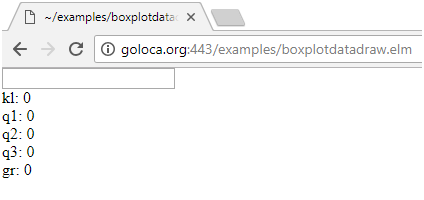
In het vakje links boven kun je de waardes voor een boxplot invullen. Vul daar de volgende waardes in uit het voorbeeld van Dr. Aart:

7,3,8,6,8,5,4,5,3,6,2,6,9,1,2,7,5,8,7,6 (Let op zet geen spaties na de komma’s).

Druk op Enter en je ziet deze boxplot:

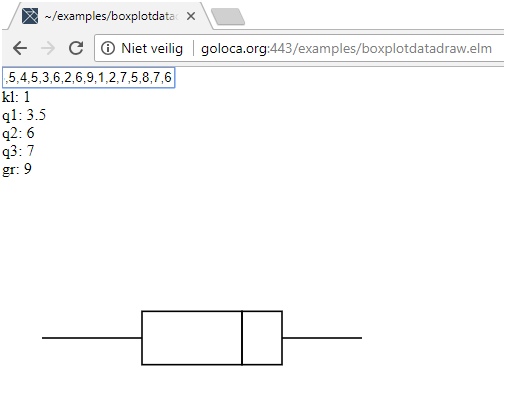




In [1]:
import Html exposing (text, div, input, Attribute)
import Html exposing (beginnerProgram)
import Html.Events exposing (on, keyCode, onInput)
import Json.Decode as Json
import String exposing(..)
import List exposing(..)
import Array exposing(..)
import Maybe exposing(..)
import Svg exposing (..)
import Svg.Attributes exposing (..)

checkedStringToFloat : String -> Float
checkedStringToFloat s =
    Result.withDefault 0 (String.toFloat s)

listStringToListFloat : List String -> List Float
listStringToListFloat ls =
    List.map checkedStringToFloat ls
    
pointsListToString: List Float -> String
pointsListToString l =

   if List.isEmpty l then
       ""
   else
      let
        x = withDefault 0 (head (take 2 l))
        y = withDefault 0 (head (withDefault [] (tail (take 2 l))))
      in
        (toString x) ++ "," ++ (toString y) ++ " " ++ (pointsListToString (drop 2 l))

mergesort : List comparable -> List comparable
mergesort list =
  case list of
    [] ->
        list

    [_] ->
        list

    _ ->
        let
          (xs, ys) = divide list
        in
          merge (mergesort xs) (mergesort ys)
divide : List a -> (List a, List a)
divide list =
  case list of
    [] ->
        ([], [])

    x :: rest ->
        let
          (xs, ys) = divide rest
        in
          (ys, x :: xs)

merge : List comparable -> List comparable -> List comparable
merge xs ys =
  case (xs, ys) of
    (x :: xBack, y :: yBack) ->
        if x < y then
          x :: merge xBack ys
        else
          y :: merge xs yBack

    ([], rest) ->
        rest

    (rest, []) ->
        rest

main =
  beginnerProgram 
  { model = 
    { outputData = []
    , inputData = ""
    }
  , view = view
  , update = update
  }


view model =
  let
    a = Array.fromList model.outputData
    kl = withDefault 0 (Array.get 0 a)
    k1 = withDefault 0 (Array.get 1 a)
    k2 = withDefault 0 (Array.get 2 a)
    k3 = withDefault 0 (Array.get 3 a)
    gr = withDefault 0 (Array.get 4 a)
    s = 200/(gr-kl)
    h = 12
    line1 = pointsListToString [kl*s, 100, k1*s, 100]
    box1 = pointsListToString [k1*s, 100-(s*((gr-kl)/h)), k2*s, 100-(s*((gr-kl)/h)), k2*s, 100+(s*((gr-kl)/h)), k1*s, 100+(s*((gr-kl)/h)), k1*s, 100-(s*((gr-kl)/h))]
    box2 = pointsListToString [k2*s, 100-(s*((gr-kl)/h)), k3*s, 100-(s*((gr-kl)/h)), k3*s, 100+(s*((gr-kl)/h)), k2*s, 100+(s*((gr-kl)/h)), k2*s, 100-(s*((gr-kl)/h))]
    line2 = pointsListToString [k3*s, 100, gr*s , 100]
  in
    div [] 
    [ input [onKeyDown KeyDown, onInput Input] []
    , div [] [ Html.text ("kl: " ++ toString kl) ]
    , div [] [ Html.text ("q1: " ++ toString k1) ]
    , div [] [ Html.text ("q2: " ++ toString k2) ]
    , div [] [ Html.text ("q3: " ++ toString k3) ]
    , div [] [ Html.text ("gr: " ++ toString gr) ]
    , svg [ viewBox "0 0 500 400", width "800px" ]
      [ 
        polyline [ fill "none", stroke "black", points line1 ] [],
        polyline [ fill "none", stroke "black", points box1 ] [],
        polyline [ fill "none", stroke "black", points box2 ] [],
        polyline [ fill "none", stroke "black", points line2 ] []
      ]
    ]

onKeyDown : (Int -> msg) -> Html.Attribute msg
onKeyDown tagger =
  on "keydown" (Json.map tagger keyCode)

type Msg 
  = NoOp
  | KeyDown Int
  | Input String


update msg model =
  case msg of

    NoOp ->
      model

    KeyDown key ->
      if key == 13 then
        { model | outputData = boxplotdata model.inputData }
      else
        model

    Input text ->
      { model | inputData = text }
      
-- insert your code here
boxplotdata : String -> List Float
boxplotdata s =
  let 
    l = split "," s
    a = Array.fromList(mergesort (listStringToListFloat l))
    k = min a
    g = max a
    k1 = q1 a
    k2 = q2 a
    k3 = q3 a
  in
    [k, k1, k2, k3, g]
    
min : Array Float -> Float
min a = 
     withDefault 0 (Array.get 0 a)

max : Array Float -> Float
max a = 
     withDefault 0 (Array.get ((Array.length a)-1) a)

q1 : Array Float -> Float
q1 a =
     if Array.length a % 4 == 0 then
        ((withDefault 0 (Array.get (((Array.length a)//4)-1) a)) + (withDefault 0 (Array.get ((Array.length a)//4) a)))/2
     else
        withDefault 0 (Array.get ((Array.length a)//4) a)

q2 : Array Float -> Float
q2 a =
     if Array.length a % 2 == 0 then
        ((withDefault 0 (Array.get (((Array.length a)//2)-1) a)) + (withDefault 0 (Array.get ((Array.length a)//2) a)))/2
     else
        withDefault 0 (Array.get ((Array.length a)//2) a)

q3 : Array Float -> Float
q3 a =
     if Array.length a % 4 == 0 then
        ((withDefault 0 (Array.get ((((Array.length a)*3)//4)-1) a)) + (withDefault 0 (Array.get (((Array.length a)*3)//4) a)))/2
     else
        withDefault 0 (Array.get (((Array.length a)*3)//4) a)
-- compile-code